In [58]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

# Membuat data 


Hasil Suara dari Sampel:
      TPS  Suara A  Suara B
0  TPS 04      265      258
1  TPS 14      181      258
2  TPS 08      118      117
3  TPS 03      297      349
4  TPS 07      133      145

Persentase Suara Paslon A: 46.86%
Persentase Suara Paslon B: 53.14%


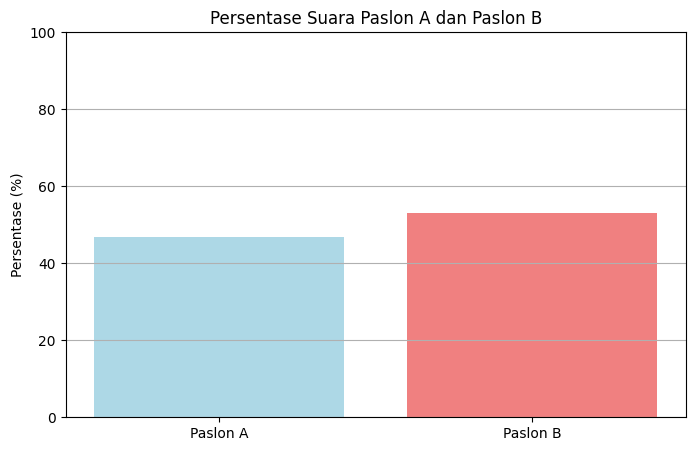

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt

# Membuat Jumlah Populasi 
n_pemilih = 278_700

# Jumlah kecamatan, kelurahan, dan TPS
n_kecamatan = 5
n_kelurahan = 8
n_tps = 16

# Daftar nama kecamatan, kelurahan, dan TPS
kecamatan = ['Kecamatan A', 'Kecamatan B', 'Kecamatan C', 'Kecamatan D', 'Kecamatan E']
kelurahan = ['Kelurahan A', 'Kelurahan B', 'Kelurahan C', 'Kelurahan D', 'Kelurahan E', 'Kelurahan F', 'Kelurahan G', 'Kelurahan H']
tps = [f'TPS {i:02d}' for i in range(1, n_tps + 1)]

# Bangkitkan data jumlah pemilih untuk masing-masing kecamatan, kelurahan, dan TPS
jumlah_pemilih_kecamatan = [round(n_pemilih * random.uniform(0.02, 0.04)) for _ in range(n_kecamatan)]
jumlah_pemilih_kelurahan = [round(jumlah_pemilih_kecamatan[i // n_kelurahan] * random.uniform(0.2, 0.4)) for i in range(n_kelurahan)]
jumlah_pemilih_tps = [round(jumlah_pemilih_kelurahan[i // n_tps] * random.uniform(0.05, 0.20)) for i in range(n_tps)]

# Buat DataFrame untuk TPS
df_tps = pd.DataFrame({
    'TPS': tps,
    'Jumlah Pemilih': jumlah_pemilih_tps
})

# Fungsi untuk melakukan simple random sampling
def simple_random_sampling(df, sample_size):
    return df.sample(n=sample_size, random_state=1)

# Mengambil sampel dari TPS
sample_tps = simple_random_sampling(df_tps, sample_size=5)

# Fungsi untuk menghitung suara acak
def hitung_suara(sample):
    results = []
    for index, row in sample.iterrows():
        total_pemilih = row['Jumlah Pemilih']
        suara_a = round(total_pemilih * random.uniform(0.4, 0.6))  # 40%-60% untuk Paslon A
        suara_b = total_pemilih - suara_a  # sisa untuk Paslon B
        results.append({'TPS': row['TPS'], 'Suara A': suara_a, 'Suara B': suara_b})
    return pd.DataFrame(results)

# Menghitung suara dari sampel
hasil_suara = hitung_suara(sample_tps)

# Menampilkan hasil suara
print("\nHasil Suara dari Sampel:")
print(hasil_suara)

# Menghitung persentase suara
total_suara_a = hasil_suara['Suara A'].sum()
total_suara_b = hasil_suara['Suara B'].sum()
total_suara = total_suara_a + total_suara_b

persentase_a = (total_suara_a / total_suara) * 100
persentase_b = (total_suara_b / total_suara) * 100

print(f"\nPersentase Suara Paslon A: {persentase_a:.2f}%")
print(f"Persentase Suara Paslon B: {persentase_b:.2f}%")

# Membuat grafik hasil suara
labels = ['Paslon A', 'Paslon B']
sizes = [persentase_a, persentase_b]
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(8, 5))
plt.bar(labels, sizes, color=colors)
plt.title('Persentase Suara Paslon A dan Paslon B')
plt.ylabel('Persentase (%)')
plt.ylim(0, 100)
plt.grid(axis='y')

# Tampilkan grafik
plt.show()

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st

# Fungsi untuk menghasilkan data pemilih dan menghitung suara
def generate_data():
    # Jumlah Pemilih 
    n_pemilih = 278_700_000

    # Jumlah kecamatan, kelurahan, dan TPS
    n_kecamatan = 5
    n_kelurahan = 8
    n_tps = 16

    # Daftar nama kecamatan, kelurahan, dan TPS
    kecamatan = ['Kecamatan A', 'Kecamatan B', 'Kecamatan C', 'Kecamatan D', 'Kecamatan E']
    kelurahan = ['Kelurahan A', 'Kelurahan B', 'Kelurahan C', 'Kelurahan D', 'Kelurahan E', 'Kelurahan F', 'Kelurahan G', 'Kelurahan H']
    tps = [f'TPS {i:02d}' for i in range(1, n_tps + 1)]

    # Bangkitkan data jumlah pemilih
    jumlah_pemilih_kecamatan = [round(n_pemilih * random.uniform(0.02, 0.04)) for _ in range(n_kecamatan)]
    jumlah_pemilih_kelurahan = [round(jumlah_pemilih_kecamatan[i // n_kelurahan] * random.uniform(0.2, 0.4)) for i in range(n_kelurahan)]
    jumlah_pemilih_tps = [round(jumlah_pemilih_kelurahan[i // n_tps] * random.uniform(0.05, 0.20)) for i in range(n_tps)]

    # Buat DataFrame untuk TPS
    df_tps = pd.DataFrame({
        'TPS': tps,
        'Jumlah Pemilih': jumlah_pemilih_tps
    })

    # Simple random sampling
    sample_tps = df_tps.sample(n=5, random_state=1)

    # Hitung suara
    results = []
    for index, row in sample_tps.iterrows():
        total_pemilih = row['Jumlah Pemilih']
        suara_a = round(total_pemilih * random.uniform(0.7, 0.9))  # 70%-90% untuk Paslon A
        suara_b = total_pemilih - suara_a  # sisa untuk Paslon B
        golput = total_pemilih - (suara_a + suara_b)  # Sisanya adalah golput
        results.append({'TPS': row['TPS'], 'Suara A': suara_a, 'Suara B': suara_b, 'Golput': golput})
    
    return pd.DataFrame(results)

# Inisialisasi Streamlit
st.title("Quick Count Hasil Pemilihan")
st.write("Selamat datang di aplikasi Quick Count! Tekan tombol di bawah untuk menghasilkan data baru.")

# Tombol untuk menghasilkan data baru
if st.button("Generate Data"):
    hasil_suara = generate_data()

    # Menghitung total suara
    total_suara_a = hasil_suara['Suara A'].sum()
    total_suara_b = hasil_suara['Suara B'].sum()
    total_golput = hasil_suara['Golput'].sum()
    total_suara = total_suara_a + total_suara_b + total_golput

    persentase_a = (total_suara_a / total_suara) * 100
    persentase_b = (total_suara_b / total_suara) * 100
    persentase_golput = (total_golput / total_suara) * 100

    # Menampilkan hasil suara
    st.write("Hasil Suara dari Sampel:")
    st.dataframe(hasil_suara)

    st.write(f"**Persentase Suara Paslon A:** {persentase_a:.2f}%")
    st.write(f"**Persentase Suara Paslon B:** {persentase_b:.2f}%")
    st.write(f"**Persentase Golput:** {persentase_golput:.2f}%")

    # Membuat grafik hasil suara
    labels = ['Paslon A', 'Paslon B', 'Golput']
    sizes = [persentase_a, persentase_b, persentase_golput]
    colors = ['lightblue', 'lightcoral', 'lightgrey']

    # Diagram Batang
    plt.figure(figsize=(8, 5))
    plt.bar(labels, sizes, color=colors)
    plt.title('Persentase Suara Paslon A, Paslon B dan Golput')
    plt.ylabel('Persentase (%)')
    plt.ylim(0, 100)
    plt.grid(axis='y')
    st.pyplot(plt)

    # Diagram Donat
    plt.figure(figsize=(8, 5))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title('Distribusi Suara Paslon A, Paslon B dan Golput')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    st.pyplot(plt)

# Menambahkan footer
st.markdown("---")
st.write("Aplikasi ini dikembangkan untuk tujuan edukasi. Terima kasih telah menggunakan aplikasi ini!")

2024-08-28 15:17:17.541 
  command:

    streamlit run /media/muhammadkrisnanda/Data Tugas/Kuliah/Mata Kuliah/Semester 3/Analisa Statistika Terapan/Code/.venv/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]
